In [1]:
import pandas as pd
import ast  # to convert stringified list back to list

# Load your preprocessed transcript data
df = pd.read_csv("cleaned_transcripts.csv")

# Convert 'tokens' back to list (if saved as string)
df['tokens'] = df['tokens'].apply(ast.literal_eval)


In [2]:
from textblob import TextBlob

# Apply TextBlob on cleaned_text
df['tb_polarity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['tb_subjectivity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Label based on polarity
def tb_label(p):
    if p > 0.05:
        return 'positive'
    elif p < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['tb_label'] = df['tb_polarity'].apply(tb_label)



C:\Users\Pranay Malhotra\AppData\Local\Temp\ipykernel_21296\3477595181.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='tb_label', palette='Set2')


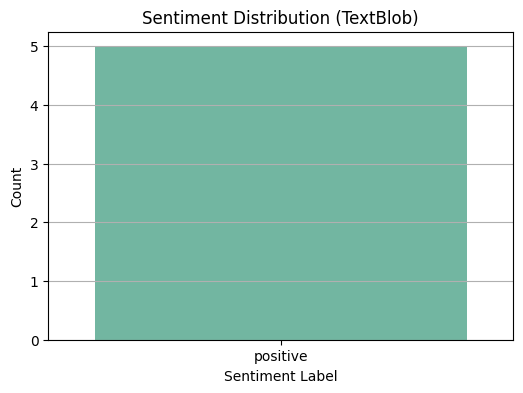

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of sentiment categories
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='tb_label', palette='Set2')
plt.title("Sentiment Distribution (TextBlob)")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


| Metric           | Meaning                                     |
| ---------------- |---------------------------------------------|
| **Polarity**     | Is the comedian being positive or negative? |
| **Subjectivity** | Are they stating facts or sharing opinions? |


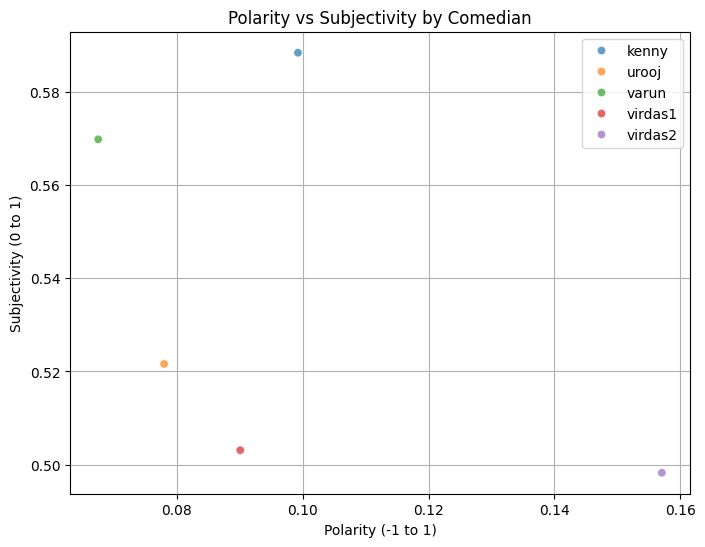

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='tb_polarity', y='tb_subjectivity', hue='comedian', alpha=0.7)
plt.title("Polarity vs Subjectivity by Comedian")
plt.xlabel("Polarity (-1 to 1)")
plt.ylabel("Subjectivity (0 to 1)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


<Figure size 1000x500 with 0 Axes>

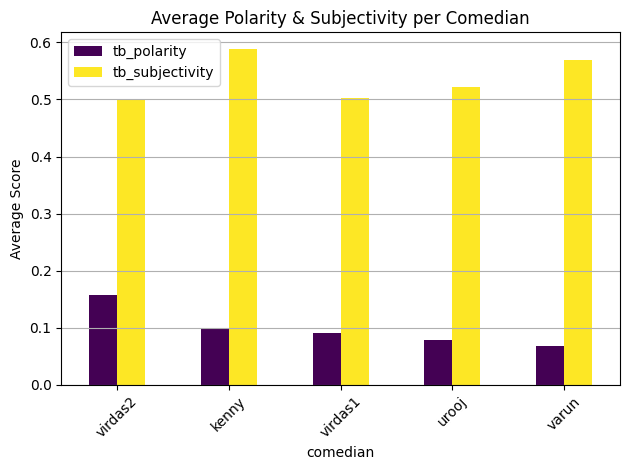

In [5]:
comedian_sentiment = df.groupby('comedian')[['tb_polarity', 'tb_subjectivity']].mean().sort_values('tb_polarity', ascending=False)

plt.figure(figsize=(10, 5))
comedian_sentiment.plot(kind='bar', rot=45, colormap='viridis')
plt.title("Average Polarity & Subjectivity per Comedian")
plt.ylabel("Average Score")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [6]:
df.to_csv("transcripts_with_sentiment.csv", index=False)
